## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chapter Two
# Some Comments on Probability Theory

### 2.1 Noise and random variables

In the preceding chapter, we represented the results of an experiment as a vector **d** whose elements were individual measurements.  Usually, however, a single number is insufficient results of an experiment represented the **d** whose elements as a vector to represent a single observation.  Measurements contain noise, and if an observation were to be performed several times, each measurement would be different.  Information about the range and shape of this scatter must also be provided to characterize the data completely.  

The concept of a *random variable* is used to describe this property.  Each random variable has definite and precise properties, governing the range and shape of the scatter of values one observes.  These properties cannot be measured directly; however, one can only make individual measurements, or *realizations*, of the random variable and try to estimate its true properties from these data.  

The true properties of the random variable *d* are specified by a *probability density function p(d)* (abbreviated *p.d.f.*).  This function gives the probability that a particular realization of the random variable will have a value in the neighborhood of *d*.  The probability that the measuremetn is between *d* and *d* + d*d* is *p(d)* d*d* (d*d* is the differential of *d*, the data).  

Since each measurement must have some value, the probability that *d* lies somewhere between $- \infty$ and $+ \infty$ is complete certainty (usually given the value of 100% or unity), which is written as:  

\begin{equation*}
\int_{- \infty}^{+ \infty} p(d) \text{d} d = 1
\end{equation*}  

The probability *P* that *d* lies in some specific range, say between $d_1$ and $d_2$, is the integral of *p(d)* over that range:

\begin{equation*}
P(d_1, d_2) = \int_{d_1}^{d_2} p(d) \text{d}d
\end{equation*}  

The special case of $d_1 = - \infty, d_2=d$, which represents the probability that the value of the random variable is less than or equal to a given value *d*, is called the *cumulative distribution function P(d)* (abbreviated *c.d.f.*).  Note that the numerical value of *P* represents an actual probability, while the numerical value of *p* does not.  

In *Python*, we use the vector *d* with evenly spaced values with sampling *Dd* to represent the random variable and we use a vector *p* to represent the probability density function at corresponding values of *d*.  Let's calculate a probability density function, simulate some values, calculate the cumulative probability density function and plot them!

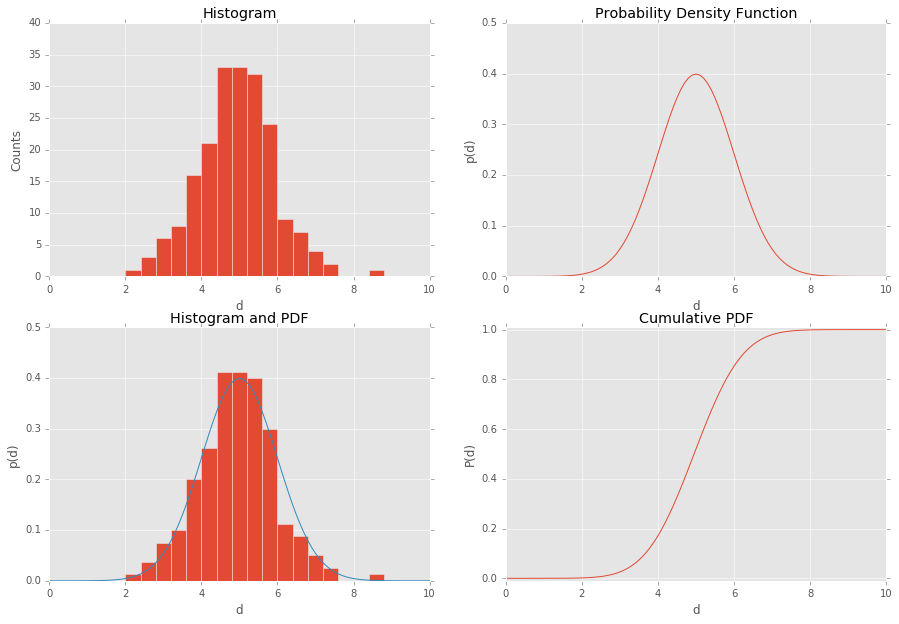

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# axes
Dd = 0.1
N = 101
d = Dd * np.arange(N)
dmin = 0
dmax = 10

# build a normal distribution
dbar = 5
sigma = 1
sigma2 = sigma ** 2
p = np.exp(-0.5 * np.multiply((d-dbar), (d-dbar)) / sigma2) / (math.sqrt(2 * math.pi) * sigma)
norm = Dd * sum(p)
p = p / norm

# randomly sample distribution
M = 200
r = np.random.normal(dbar, sigma, M)
Nb = 26
Db = (dmax - dmin) / (Nb - 1)
bins = dmin + Db * np.arange(Nb)

# cumulative probability
P = Dd * np.cumsum(p)

# build figure
plt.subplots(2,2, figsize=(15,10))

# plot histogram of randomly sampled data
plt.subplot(221)
plt.hist(r, bins)
plt.ylim(0, 40)
plt.xlim(0, 10)
plt.title('Histogram')
plt.xlabel('d')
plt.ylabel('Counts')

# plot probability density function
plt.subplot(222)
plt.plot(d, p)
plt.ylim(0, 0.5)
plt.xlim(0, 10)
plt.title('Probability Density Function')
plt.xlabel('d')
plt.ylabel('p(d)')

# plot probability density function overlain on histogram
plt.subplot(223)
plt.hist(r, bins, normed=True)
plt.plot(d, p)
plt.ylim(0, 0.5)
plt.xlim(0, 10)
plt.title('Histogram and PDF')
plt.xlabel('d')
plt.ylabel('p(d)')

# plot cumulative probability density function
plt.subplot(224)
plt.plot(d, P)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 10)
plt.title('Cumulative PDF')
plt.xlabel('d')
plt.ylabel('P(d)')

Here we are employing the Riemann approximation for an integral, $\int p(d)$ such that $\text{d}d \approx \Delta d \Sigma_i p(d_i)$.  

The probability density function *p(d)* completely describes the random variable, *d*.  Unfortunately, it is a continuous function that may be quite complicated.  A few numbers that summarize the major properties of the probability density function can be very helpful.  One such kind of number indicates the typical numerical value of a measurement.  The most likely measurement is the one with the highest probability, that is, the value of *d* at which *p(d)* is peaked.  However, if the distribution is skewed, this *maximum likelihood point* may not be a good indication of the typical measurement, since a wide range of other values also has high probability.  In such instances, the *mean*, or *expected* measurement, $\langle d \rangle$, is a better characterization of a typical measurement.  This number is the "balancing point" of the distribution and is given by:  

\begin{equation*}
\langle d \rangle = E(d) = \int_{- \infty}^{+ \infty} d p(d) \text{d}d
\end{equation*}

The square root of the variance, $\sigma$, is a measure of the width of the distribution.  Now let's calculate the mode and mean for a skewed PDF.

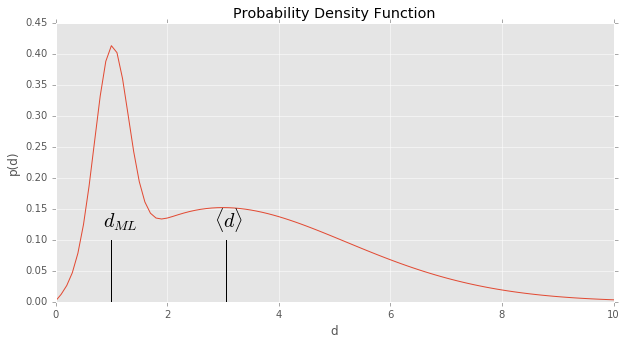

In [2]:
# d-axis
Dd = 0.1
N = 101
d = Dd * np.arange(N)

# normal PDF
dbar = 0
sd = 3
p = np.multiply(d, np.exp(-0.5 * np.multiply((d-dbar), (d-dbar)) / sd ** 2))
dbar = 1
sd = 0.3
p = p + 4 * np.exp(-0.5 * np.multiply((d-dbar), (d-dbar)) / sd ** 2)
norm = Dd * sum(p)
p = p / norm

# maximum likelihood point
imax = np.argmax(p)
dmax = d[imax]
dbar = Dd * sum(np.multiply(d, p))

# build plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(d, p)
plt.xlabel('d')
plt.ylabel('p(d)')
plt.title('Probability Density Function')
ax.plot((dmax, dmax), (0, 0.1), 'k-')
ax.annotate('$d_{ML}$', xy=(dmax-0.15, 0.12), size=20)
ax.plot((dbar, dbar), (0, 0.1), 'k-')
ax.annotate(r'$\langle d \rangle$', xy=(dbar-0.2, 0.12), size=20)

Another property of a distribution is its overall width.  Wide distributions implly very noisy data, and narrow ones imply relatively noise-free data.  One way of measuring the width of a distribution is to multiply it by a function that is zero near the center (peak) of the distribution and that grows on either side of the peak.  If the distribution is narrow, then the resulting function will be everywhere small; if the distribution is wide, then the result will be large.  

A quantitative measure of the width of the peak is the area under the resulting function.  If one chooses the parabola $(d - \langle d \rangle)^2$ as the function, where $\langle d \rangle = E(d)$ is the expected value of the random variable, then this measure is called the *variance* $\sigma^2$ of the distribution and is written as:  

\begin{equation*}
\sigma^2 = \int_{- \infty}^{+ \infty} (d - \langle d \rangle)^2 p(d) \text{d}d
\end{equation*}

Here **d** is a vector of equally spaced values of the random variable *d*, with spacing *Dd*, and *p* is the corresponding value of the probability density function.  The mean and variance can be estimated from a set of *N* realizations of data $d_i$ as:

\begin{equation*}
\langle d \rangle^{\text{est}} = \frac{1}{N} \Sigma_{i=1}^N d_i
\qquad \text{and} \qquad
(\sigma^2)^{\text{est}} = \frac{1}{N-1} \Sigma_{i=1}^N (d_i - \langle d \rangle^{\text{est}})^2
\end{equation*}

The quantity $\langle d \rangle^{\text{est}}$ is called the *sample mean* and the quantity $\sigma^{\text{est}}$ is called the *sample standard deviation*.

Let's build some quadratics to estimate variance!

std dev 1:     true: 0.5     estimated: 0.5
std dev 2:     true: 1.5     estimated: 1.4924568553525561


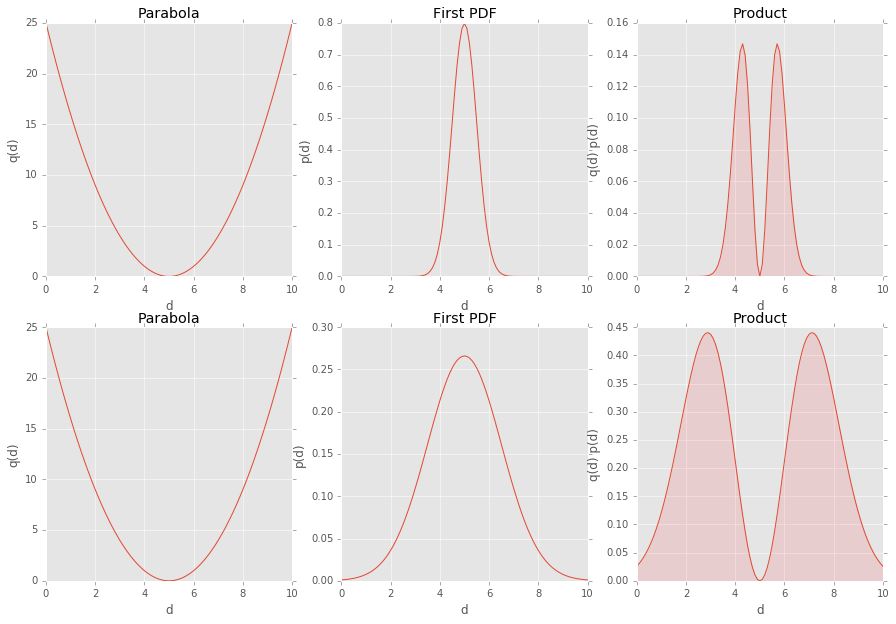

In [3]:
# d axis
Dd = 0.1
N = 101
d = Dd * np.arange(N)

# build two normal PDF's
dbar = 5
sd1 = 0.5
p1 = np.exp(-0.5 * np.multiply((d-dbar), (d-dbar)) / sd1 ** 2) / (math.sqrt(2 * math.pi) * sd1)
norm1 = Dd * sum(p1)
sd2 = 1.5
p2 = np.exp(-0.5 * np.multiply((d-dbar), (d-dbar)) / sd2 ** 2) / (math.sqrt(2 * math.pi) * sd2)
norm2 = Dd * sum(p2)

# quadratic
q = np.multiply((d-dbar), (d-dbar))

# products
qp1 = np.multiply(q, p1)
qp2 = np.multiply(q, p2)

# estimate variances
sd21 = Dd * sum(qp1)
sd1est = math.sqrt(sd21)
sd22 = Dd * sum(qp2)
sd2est = math.sqrt(sd22)
print('std dev 1:     true: %s     estimated: %s' % (sd1, sd1est))
print('std dev 2:     true: %s     estimated: %s' % (sd2, sd2est))

# build figure
plt.subplots(2,3, figsize=(15,10))

# plot parabola
plt.subplot(231)
plt.plot(d, q)
plt.title('Parabola')
plt.xlabel('d')
plt.ylabel('q(d)')

# plot PDF
plt.subplot(232)
plt.plot(d, p1)
plt.title('First PDF')
plt.xlabel('d')
plt.ylabel('p(d)')

# plot product (variance)
plt.subplot(233)
plt.plot(d, qp1)
plt.title('Product')
plt.xlabel('d')
plt.ylabel('q(d) p(d)')
plt.fill_between(x=d, y1=np.zeros(qp1.shape), y2=qp1, facecolor='red', alpha=0.1)

# plot parabola
plt.subplot(234)
plt.plot(d, q)
plt.title('Parabola')
plt.xlabel('d')
plt.ylabel('q(d)')

# plot PDF
plt.subplot(235)
plt.plot(d, p2)
plt.title('First PDF')
plt.xlabel('d')
plt.ylabel('p(d)')

# plot product (variance)
plt.subplot(236)
plt.plot(d, qp2)
plt.title('Product')
plt.xlabel('d')
plt.ylabel('q(d) p(d)')
plt.fill_between(x=d, y1=np.zeros(qp2.shape), y2=qp2, facecolor='red', alpha=0.1)

### 2.2 Correlated data
Experiments usually involve the collection of more than one datum.  We therefore need to quantify the probability that a set of random variables will take on a given value.  The joint probability density function p(**d**) is the probability that the first datum will be in the neighborhood of $d_1$, that the second will be in the neighborhood of $d_2$, etc.  If the data are independent - that is, if there are no patterns in the occurrence of the values between pairs of random vairables - then this joint distribution is just the product of the individual distributions.

\begin{equation*}
p(\mathbf{d}) = p(d_1) p(d_2) p(d_3) \cdots p(d_N)
\end{equation*}

The probability density function for a single random variable, say $d_i$, irrespective of all the others, is computed by integrating p(**d**) over all the other variables:

\begin{equation*}
p(d_i) = \int_{- \infty}^{+ \infty} \cdots \int_{- \infty}^{+ \infty} p(\mathbf{d}) \text{d} d_j \text{d} d_k \cdots \text{d} d_l
\\
(N-1 integrals)
\end{equation*}

In some experiments, measurements *are* correlated.  High values of one datum tend to occur consistently with either high or low values of another datum.  The joint distribution for such data must be constructed to take this correlation into account.  Given a joint distribution $p(d_1, d_2)$ for two random variables $d_1$ and $d_2$, one can test for correlation by selecting a function that divides the $(d_1, d_2)$ plane into four quadrants of alternating sign, centered on the mean of the distribution.  If one multiplies the distribution by this function, and then sums up the area, the result will be zero for uncorrelated distributions, since they tend to lie equally in all four quadrants.  Correlated distributions will have either positive or negative area, since they tend to be concentrated in two opposite quadrants.  If $[d_1 - \langle d_1 \rangle][d_2 - \langle d_2 \rangle]$ is used as the function, the resulting measure of correlation is called the covariance:  

\begin{equation*}
\text{cov}(d_1, d_2) = \int_{- \infty}^{+ \infty} \int_{- \infty}^{+ \infty} [d_1 - \langle d_1 \rangle][d_2 - \langle d_2 \rangle] p(d_1, d_2) \text{d} d_1 \text{d} d_2
\end{equation*}

Note that the covariance of a datum with itselft is just the variance.  The covariance, therefore, characterizes the basic shape of the joint distribution.  When there are many data given by the vector **d**, it is convenient to define a vector of expected values and a matrix of covariances as:

\begin{equation*}
\langle d \rangle_i = \int_{- \infty}^{+ \infty} \cdots \int_{- \infty}^{+ \infty} d_i p(\mathbf{d}) \text{d} d_1 \cdots \text{d} d_N \\
[cov \mathbf{d}]_{i,j} = \int_{- \infty}^{+ \infty} \cdots \int_{- \infty}^{+ \infty} [d_i - \langle d_i \rangle][d_j - \langle d_j \rangle]p(\mathbf{d}) \text{d} d_1 \cdots \text{d} d_N
\end{equation*}

Henceforth, we will abbreviate these multidimensional integrals as $\int \text{d}^N d$.  The diagonal elements of the covariance matrix are variances.  They are measures of the scatter in the data.  The off-diagonal elements are covariances.  They indicate the degree to which pairs of data are correlated.  Notice that hte integral for the mean can be written in terms of the univariate probability density function *p(d_i)$ and the integral for the variance can be written in terms of the bivariate probability density function $p(d_i, d_j)$, since the other dimension of p(**d**) are just "integrated away" to unity:  

\begin{equation*}
\langle d \rangle_i = \int_{- \infty}^{+ \infty} d_i p(d_i) \text{d} d_i \\
[cov \mathbf{d}]_{i,j} = \int_{- \infty}^{+ \infty} \int_{- \infty}^{+ \infty} [d_i - \langle d_i \rangle][d_j - \langle d_j \rangle] p(d_i, d_j) \text{d} d_i \text{d} d_j
\end{equation*}

The covariance matrix can be estimated from a set of *N* realizations of data.  Suppose that there are *N* different types of data and that *K* realizations of them have been observed.  The data can be organizaed into a matrix **D**, with the *N* columns referring to the different data types and the *K* rows to the different realizations.  The *sample covariance* is then:

\begin{equation*}
[cov \mathbf{d}]_{i,j}^{\text{est}} = \frac{1}{K} \Sigma_{k=1}^{K} (D_{k,i} - \langle D_i \rangle^{\text{est}})(D_{k,j} - \langle D_j \rangle^{\text{est}})
\end{equation*}

Here, $\langle D_i \rangle^{\text{est}}$ is the sample mean of the *i*th data type.

Now, let's examine the probability density function $p(d_1, d_2)$ displayed as an image for uncorrelated, positively correlated, and negatively correlated data.

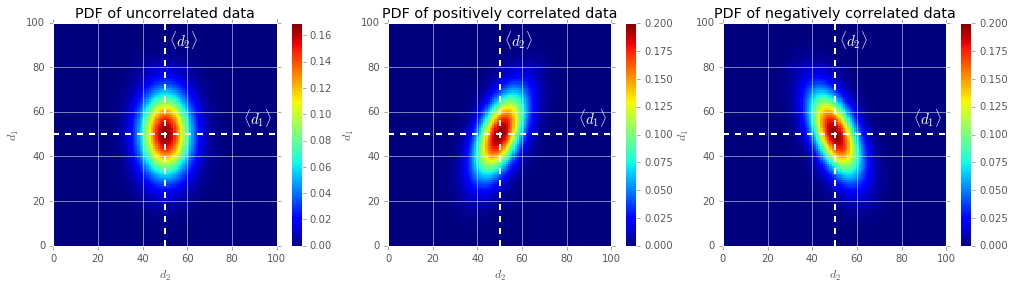

In [4]:
# d axis
Dd = 0.1
N = 101
d1 = Dd * np.arange(N)
d2 = Dd * np.arange(N)
dmin = 0
dmax = 10

# simulate uncorrelated data
d1bar = 5
d2bar = 5
sd1 = 1.25
sd2 = 0.75
cov = 0
C = np.zeros((2,2))
C[0,0] = sd1 ** 2
C[1,1] = sd2 ** 2
C[0,1] = cov
C[1,0] = cov
norm = 2 * math.pi * math.sqrt(np.linalg.det(C))
CI = np.linalg.inv(C)
P1 = np.zeros((N,N))
for i in range(0, N):
    for j in range(0, N):
        dd = np.array([dmin + Dd * i - d1bar, dmin + Dd * j - d2bar])
        P1[i, j] = np.exp(-0.5 * dd.dot(CI).dot(dd)) / norm
        
mycov = 0.5
        
# simulate positively correlated data
C[0,1] = mycov
C[1,0] = mycov
norm = 2 * math.pi * math.sqrt(np.linalg.det(C))
CI = np.linalg.inv(C)
P2 = np.zeros((N,N))
for i in range(0, N):
    for j in range(0, N):
        dd = np.array([dmin + Dd * i - d1bar, dmin + Dd * j - d2bar])
        P2[i, j] = np.exp(-0.5 * dd.dot(CI).dot(dd)) / norm
        
# simulate negatively correlated data
C[0,1] = - mycov
C[1,0] = - mycov
norm = 2 * math.pi * math.sqrt(np.linalg.det(C))
CI = np.linalg.inv(C)
P3 = np.zeros((N,N))
for i in range(0, N):
    for j in range(0, N):
        dd = np.array([dmin + Dd * i - d1bar, dmin + Dd * j - d2bar])
        P3[i, j] = np.exp(-0.5 * dd.dot(CI).dot(dd)) / norm

# build plot
plt.subplots(1,3, figsize=(17,4))

# subplot of PDF of uncorrelated data
plt.subplot(131)
plt.imshow(P1, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('PDF of uncorrelated data')
plt.plot((50, 50), (0, 100), 'w--', linewidth=2)
plt.plot((0, 100), (50, 50), 'w--', linewidth=2)
plt.annotate(r'$\langle d_2 \rangle$', xy=(52, 90), xycoords='data', color='white', size=15)
plt.annotate(r'$\langle d_1 \rangle$', xy=(85, 55), xycoords='data', color='white', size=15)

# subplot of PDF of positively correlated data
plt.subplot(132)
plt.imshow(P2, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('PDF of positively correlated data')
plt.plot((50, 50), (0, 100), 'w--', linewidth=2)
plt.plot((0, 100), (50, 50), 'w--', linewidth=2)
plt.annotate(r'$\langle d_2 \rangle$', xy=(52, 90), xycoords='data', color='white', size=15)
plt.annotate(r'$\langle d_1 \rangle$', xy=(85, 55), xycoords='data', color='white', size=15)

# subplot of PDF of negatively correlated data
plt.subplot(133)
plt.imshow(P3, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('PDF of negatively correlated data')
plt.plot((50, 50), (0, 100), 'w--', linewidth=2)
plt.plot((0, 100), (50, 50), 'w--', linewidth=2)
plt.annotate(r'$\langle d_2 \rangle$', xy=(52, 90), xycoords='data', color='white', size=15)
plt.annotate(r'$\langle d_1 \rangle$', xy=(85, 55), xycoords='data', color='white', size=15)

### 2.3 Functions of random variables  
The basic premise of inverse theory is that the data and model parameters are related.  Any method that solves the inverse problem  that estimates a model parameter on the basis of data - will map errors from the data to the estimated model parameters.  Thus the *estimates* of the model parameters are themselves random variables, which are described by a distribution $p(\mathbf{m^{est}})$.  Whether or not the *true* model parameters are random variables de3pends on the problem.  It is appropriate to consider them deterministic quantities in some problems and random variables in others.  *Estimates* of the model parameters, however, are always random variables.  

We need the tools to transform probability density functions from $p(\mathbf{d})$ to $p(\mathbf{m})$ when the relationship **m(d)** is known.  We start simply and consider just one datum and one model parameter, related by the simple function *m(d) = 2d*.  Now suppose that *p(d)* is *uniform* on the interval (0,1); that is, *d* has equal probability of being anywhere in this range.  The probability density function is constant and must have amplitude *p(d) = 1*, since the total probability must be unity ($\text{width} \times \text{height} = 1 \times 1 = 1$).  The probability density function *p(m)* is also uniform, but on the interval (0, 2), since *m* is twice *d*.  Thus, $p(m)=\frac{1}{2}$, since its total probability must also be unity ($\text{width} \times \text{height} = 2 \times \frac{1}{2} = 1$).  This result shows that *p(m)* is not merely *p[d(m)]*, but rather must include a factor that accounts for the stretching (or shrinking) of the *m*-axis with respect to the *d*-axis.  

This stretching factor can be derived by transforming the integral for total probability:  

\begin{equation*}
1 = \int_{d_{min}}^{d_{max}} p(d) \text{d}d 
= \int_{d(m_{min})}^{d(m_{max})} p[d(m)] \frac{\text{d}d}{\text{d}m} \text{d}m 
= \int_{m_{min}}^{m_{max}} p(m) \text{d}m
\end{equation*}

By inspection, *p(m) = p[d(m)]*d*d/*d*m*, so the stretching factor is d*d*/d*m*.  The limits ($d_{min}, d_{max}$) transform to ($m_{min}, m_{max}$).  However, depending upon the function *m(d)*, we may find that $m_{min} > m_{max}$; that is, the direction of integration might be reversed (*m(d) = 1/d* would be one such case).  We handle this problem by adding an absolute value sign

\begin{equation*}
p(m) = p[d(m)] \left| \frac{\text{d}d}{\text{d}m} \right|
\end{equation*}

together with the understanding that the integration is always performed in the direction of positive *m*.  Note that in the case above, with *p(d)=1* and *m(d)=2d*, we find d*d*/d*m*=$\frac{1}{2}$ and (as expected) $p(m) = 1 \times \frac{1}{2} = \frac{1}{2}$.  

In general, probability density functions change shape when transformed from *d* to *m*.  Consider, for example, the uniform probability density function *p(d)=1* on the inverval (0,1) together with the function $m(d) = d^2$.  We find $d=m^{\frac{1}{2}}$, $\text{d}d/\text{d}m = \frac{1}{2} m^{-\frac{1}{2}}$, and $p(m) = \frac{1}{2} m^{- \frac{1}{2}}$, with *m* defined on the interval (0, 1).  Thus, while *p(d)* is uniform, *p(m)* has a peak (actually an integrable singularity) at *m=0*.

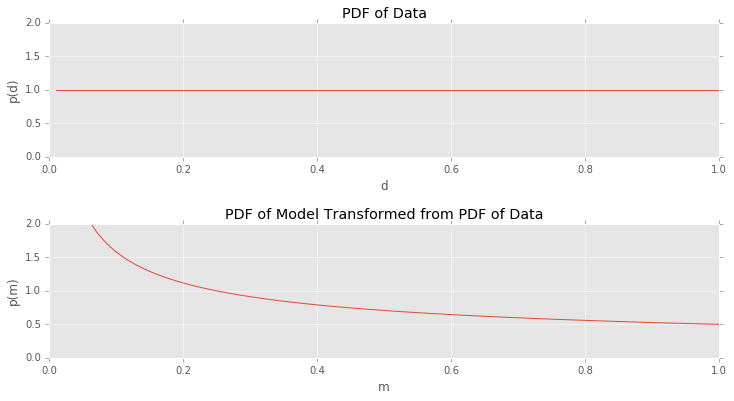

In [5]:
# d-axis
dd = 0.01
N = 101
d = dd * np.arange(1,N)

# m-axis
dm = 0.01
M = 101
m = dm * np.arange(1,M)

# build uniform distribution for p(d)
pd = np.ones(N-1)

# transform probability density function p(d) to p(m)
J = abs(0.5 / np.sqrt(d))
pm = np.multiply(pd, J)

# build plot
plt.subplots(2,1, figsize=(12,6))
plt.subplots_adjust(hspace=0.5)

plt.subplot(211)
plt.plot(d, pd)
plt.xlabel('d')
plt.ylabel('p(d)')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title('PDF of Data')

plt.subplot(212)
plt.plot(m, pm)
plt.xlabel('m')
plt.ylabel('p(m)')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title('PDF of Model Transformed from PDF of Data')

The general case of tranforming *p*(**d**) to *p*(**m**), given the functional relationship **d(m)**, is more complicated but is derived using the rule for transforming multidimensional integrals that is analogous to the equation above.  This rule states that the volume element transforms as $\text{d}^N d = J(\mathbf{m}) \text{d}^N m$ where $J(\mathbf{m}) = | \text{det} (\partial \mathbf{d} / \partial \mathbf{m})|$ is the *Jacobian determinant*, that is, the absolute value of the determinant of the matrix whose elements are $[\partial \mathbf{d} / \partial \mathbf{m}]_{i,j} = \partial d_i / \partial m_j$:  

\begin{equation*}
1 = \int p(\mathbf{d}) \text{d}^N d 
= \int p[\mathbf{d}(\mathbf{m})] \left| \text{det} \left[ \frac{\partial \mathbf{d}}{\partial \mathbf{m}} \right] \right| \text{d}^N m 
= \int p[\mathbf{d}(\mathbf{m})] J(\mathbf{m}) \text{d}^N m 
= \int p(\mathbf{m}) \text{d}^N m
\end{equation*}

Hence, by inspection, we find that the probability density function transforms as  

\begin{equation*}
p(\mathbf{m}) 
= p[\mathbf{d}(\mathbf{m})] \left| \text{det} \left[ \frac{\partial \mathbf{d}}{\partial \mathbf{m}} \right] \right| 
= p[\mathbf{d}(\mathbf{m})] J(\mathbf{m})
\end{equation*}  

Note that for the linear transformation **m=Md**, the Jacobian is constant, with the value $J = | \text{det}(\mathbf{M}^{-1})| = | \text{det}(\mathbf{M})|^{-1}$.  As an example, consider a two-dimensional probability desnity function that is uniform on the intervals (0, 1) for $d_1$ and (0, 1) for $d_2$, together with the transformation $m_1 = d_1 + d_2$, $m_2 = d_1 - d_2$.  *p*(**d**) corresponds to a square of unit area in the ($d_1, d_2$) plane and *p*(**m**) corresponds to a square of area 2 in the ($m_1, m_2$) plane.  In order that the total area be unity in both cases, we must have *p*(**d**)=1 and *p*(**m**)=$\frac{1}{2}$.  The transformation matrix is 

\begin{equation*}
M = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\qquad \text{so} \qquad
\left| \text{det}(M) \right| = 2
\qquad \text{and} \qquad
J = \frac{1}{2}
\end{equation*}

Thus, we find that $p(\mathbf{m}) = p(\mathbf{d}) J = 1 \times \frac{1}{2} = \frac{1}{2}$, which agrees with our expectations.  

Note that we can convert *p*(**d**) to a univariate distribution $p(d_1)$ by integrating over $d_2$.  Since the sides of the square are parallel to the coordinate axes, the integration yields the uniform probability density function, $p(d_1) = 1$.  Similarly, we can convert *p*(**m**) to a univariate distribution $p(m_1)$ by integrating over $m_2$.  However, because the sides of the square are oblique to the coordinate axes, $p(m_1)$ is a triangular - not a uniform - probability density function.  

Transforming a probability density function *p*(**d**) is straightforward, but tedious.  Fortunately, in the case of the linear function **m** = **Md** + **v**, where **M** and **v** are an arbitrary matrix and vector, respectively, it is possible to make some statements about hte properties of the results without explicitly calculating the transformed probability density function *p*(**m**).  In particular, the mean and covariance can be shown, respectively, to be  

\begin{equation*}
\langle \mathbf{m} \rangle = \mathbf{M} \langle \mathbf{d} \rangle + \mathbf{v}
\qquad \text{and} \qquad
[\text{cov} \: \mathbf{m}] = \mathbf{M} [\text{cov} \: \mathbf{d}] \mathbf{M}^T
\end{equation*}  

These rules are derived by transforming the definition of the mean and variance:  

\begin{equation*}
\langle m \rangle_i 
= \int m_i p(\mathbf{m}) \text{d}^N m 
= \int \Sigma_j M_{i,j} d_j p[\mathbf{d}(\mathbf{m})] \left| \text{det} \left[ \frac{\partial \mathbf{d}}{\partial \mathbf{m}} \right] \right| \left| \text{det} \left[ \frac{\partial \mathbf{m}}{\partial \mathbf{d}} \right] \right| \text{d}^N d 
= \Sigma_j M_{i,j} \int d_j p(\mathbf{d}) \text{d}^N d 
= \Sigma_j M_{i,j} \langle d_j \rangle
\end{equation*}

\begin{equation*}
\begin{matrix}
[cov \: \mathbf{m}] = & \: \\
= & \int(m_i - \langle m \rangle_i) (m_j - \langle m_j \rangle) p(\mathbf{m}) \text{d}^N m \\
= & \int \Sigma_p (M_{i,p} d_p - M_{i,p} \langle d_p \rangle) \Sigma_q (M_{j,q} d_q - M_{j,q} \langle d_q \rangle) \\
\: & p[\mathbf{d} (\mathbf{m})] \left| \text{det} \left[ \frac{\partial \mathbf{d}}{\partial \mathbf{m}} \right] \right| \left| \text{det} \left[ \frac{\partial \mathbf{m}}{\partial \mathbf{d}} \right] \right| \text{d}^N d \\
= & \Sigma_p \Sigma_q M_{i,p} M_{j,q} \int (d_p - \langle d_p \rangle )(d_q - \langle d_q \rangle ) p(\mathbf{d}) \text{d}^N d \\
= & \Sigma_p \Sigma_q M_{i,p} [cov \: \mathbf{d}]_{p,q} M_{j,q}
\end{matrix}
\end{equation*}  

The **covariance** equation above is very important because the covariance of the data is a measure of the amount of measurement error.  The equation functions as a rule for *error propagation*; that is, given $[cov \: \mathbf{d}]$ representing measurement error, it provides a way to compute $[cov \: \mathbf{m}]$ representing the corresponding error in the model parameters.  While the rule requires that the data and the model parameters be linearly related, it is independent of the functional form of the probability density function $p(\mathbf{d})$.  Furthermore, it can be shown to be correct even when the matrix **M** is not square.  

As an example, consider a model parameter $m_1$, which is linearly related to the data by  

\begin{equation*}
m_1 = \frac{1}{N} \Sigma_{i=1}^N d_i = \frac{1}{N}[1, 1, 1, \cdots, 1] \mathbf{d}
\end{equation*}  

Note that this formula is the sample mean.  This formula implies that matrix **M** = [1, 1, 1, ..., 1]/*N* and vector **v**=0.  Suppose that the data are uncorrelated and all have the same mean $\langle d \rangle$ and variance $\sigma_d^2$.  Then we see that $\langle m_1 \rangle = \mathbf{M} \langle \mathbf{d} \rangle + \mathbf{v} = \langle d \rangle$ and $\text{var}(m_1) = \mathbf{M} [cov \: \mathbf{d}] \mathbf{M}^T = \sigma_d^2 / N$.  The model parameter $m_1$ has a probability density function $p(m_1)$ with the same mean as **d**; that is, $\langle m_1 \rangle = \langle d \rangle$.  Hence it is an estimate of the mean of the data.  Its variance $\sigma_m^2 = \sigma_d^2 / N$ is less than the variance of **d**.  The square root of the variance, which is a measure of the width of the $p(m_1)$, is proportional to $N^{-\frac{1}{2}}$.  Thus, accuracy of determining the mean of a group of data increases as the number of observations increases, albeit slowly (because of the square root).  

In the case of uncorrelated data with uniform variance (that is, $[\text{cov} \: \mathbf{d}] = \sigma_d^2 \mathbf{I}$), the covariance of the model parameters is $[\text{cov} \: \mathbf{m}] = \mathbf{M} [\text{cov} \: \mathbf{d}] \mathbf{M}^T = \sigma_d^2 \mathbf{MM}^T$.  In general, $\mathbf{MM}^T$, while symmetric, is not diagonal.  Not only do the model parameters have unequal variance, but they are also correlated.  Strongly correlated model parameters are usually undesirable, but good experimental design can sometimes eliminate them.  

### 2.4 Gaussian probability density functions  

The probability density function for a particular random variable can be arbitrarily complicated, but in many instances, data possess the rather simple *Gaussian* (or *Normal*) probability density function  

\begin{equation*}
p(d) = \frac{1}{(2 \pi)^{1/2} \sigma} \text{exp} \left[ - \frac{(d - \langle d \rangle)^2}{2 \sigma^2} \right]
\end{equation*}  

This probability density function has mean $\langle d \rangle$ and variance $\sigma^2$.  The Gaussian probability desnity function is so common because it is the limiting probability density function for the sum of random variables.  The *central limit theorem* shows (with certain limitations) that regardless of the probability density function of a set of independent random variables, the probability density function of their sum tends to a Gaussian distribution as the number of summed variables increases.  As long as the noise in the data comes from several sources of comparable size, it will tend to follow a Gaussian probability density function.  This behavior is exemplified by the sum of the two uniform probability density functions from the previous **Section 2.3**.  The probability density function of their sum is more nearly Gaussian than the individual probability de3nsity functions (it being traingular instead of rectangular).  



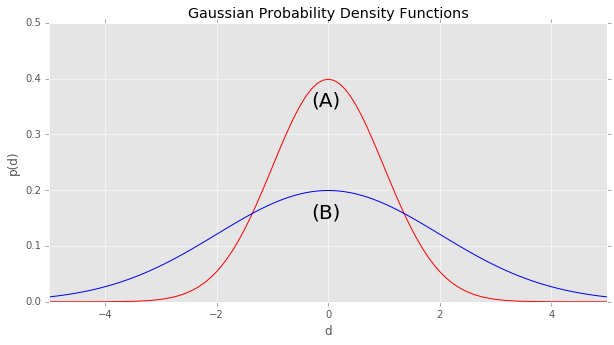

In [6]:
# data-axis
dd = 0.1
N = 101
dmin = -5
dmax = 5
d = dmin + dd * np.arange(N)

# first Gaussian distribution
sd_a = 1.0
dbar_a = 0.0
p_a = np.exp(-0.5 * np.multiply(d-dbar_a, d-dbar_a) / sd_a**2) / (math.sqrt(2 * math.pi) * sd_a)

# second Gaussian distribution
sd_b = 2.0
dbar_b = 0.0
p_b = np.exp(-0.5 * np.multiply(d-dbar_b, d-dbar_b) / sd_b**2) / (math.sqrt(2 * math.pi) * sd_b)

# build plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(d, p_a, 'r-', d, p_b, 'b-')
plt.xlabel('d')
plt.ylabel('p(d)')
plt.xlim(dmin, dmax)
plt.ylim(0, 0.5)
plt.title('Gaussian Probability Density Functions')
ax.annotate('(A)', xy=(-0.3, 0.35), size=20)
ax.annotate('(B)', xy=(-0.3, 0.15), size=20)

The joint probability density function for two independent Gaussian variables is just the product of the two univariate probability density functions.  When the data are correlated (say, with mean $\langle \mathbf{d} \rangle$ and covariance $[\text{cov} \: \mathbf{d}]$), the joint probability density function is more complicated, since it must express the degree of correlation.  The appropriate generalization can be shown to be  

\begin{equation*}
p(\mathbf{d}) = \frac{1}{(2 \pi)^{N/2}(\text{det}[\text{cov} \: \mathbf{d}])^{1/2}}
\text{exp} \left( - \frac{1}{2} [\mathbf{d} - \langle \mathbf{d} \rangle]^T [\text{cov} \: \mathbf{d}]^{-1} [\mathbf{d} - \langle \mathbf{d} \rangle] \right)
\end{equation*}  

Note that this probability desnity function reduces to the earlier Guassian PDF in the special case of $N=1$ (where $[\text{cov} \: \mathbf{d}] becomes $\sigma_d^2$).  It is perhaps not apparent that the general case has an area of unity, a mean of $\langle \mathbf{d} \rangle$ and a covariance matrix of $[\text{cov} \: \mathbf{d}]$.  However, these properties can be derived by inserting the above equation into the relevant integral and transforming to the new variable $\mathbf{y} = [\text{cov} \: \mathbf{d}]^{-1/2}[\mathbf{d} - \langle \mathbf{d} \rangle]$ (whence the integral becomes substantially simplified).  

When $p(\mathbf{d})$ is transformed using the linear rule **m** = **Md**, the resulting $p(\mathbf{m})$ is also Gaussian in form with mean $\langle \mathbf{m} \rangle = \mathbf{M} \langle \mathbf{d} \rangle$ and covariance matrix $[\text{cov} \: \mathbf{m}] = \mathbf{M} [\text{cov} \: \mathbf{d}] \mathbf{M}^T$.  Thus, all linear functions of Gaussian random variables are themselves Gaussian.  

Later, we will show that the information contained in each of two probability density functions can be combined by multiplying the two distributions.  Interestingly, the product of two Gaussian probability density functions is itself Gaussian.  Given Gaussian $p_A(\mathbf{d})$ with mean $\langle \mathbf{d}_A \rangle$ and covariance $[\text{cov} \: \mathbf{d}]_A$ and Gaussian $p_B(\mathbf{d})$ with mean $\langle \mathbf{d}_B \rangle$ and covariance $[\text{cov} \: \mathbf{d}]_B$, the product $p_C(\mathbf{d}) = p_A(\mathbf{d}) p_B(\mathbf{d})$ is Gaussian with mean and variance defined as:  

\begin{equation*}
\langle \mathbf{d}_C \rangle = \left( [\text{cov} \: \mathbf{d}]_A^{-1} + [\text{cov} \: \mathbf{d}]_B^{-1} \right)^{-1}
\left( [\text{cov} \: \mathbf{d}]_A^{-1} \langle \mathbf{d}_A \rangle + [\text{cov} \: \mathbf{d}]_B^{-1} \langle \mathbf{d}_B \rangle \right)
\\
[\text{cov} \: \mathbf{d}]_C^{-1} = [\text{cov} \: \mathbf{d}]_A^{-1} + [\text{cov} \: \mathbf{d}]_B^{-1}
\end{equation*}  

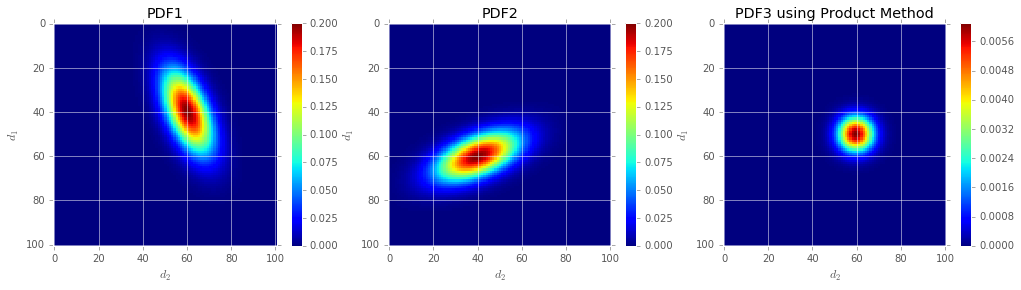

In [7]:
# data-axis
Dd = 0.1
N = 101
d1 = Dd * np.arange(N)
d2 = Dd * np.arange(N)
dmin = 0
dmax = 10

# first probability density function
d1bar = 4
d2bar = 6
DBAR1 = np.array([d1bar, d2bar])
sd1 = 1.25
sd2 = 0.75
cov = 0.5
C1 = np.zeros((2,2))
C1[0,0] = sd1 ** 2
C1[1,1] = sd2 ** 2
C1[0,1] = cov
C1[1,0] = cov
norm = 2 * math.pi * math.sqrt(np.linalg.det(C1))
C1I = np.linalg.inv(C1)
P1 = np.zeros((N,N))
for i in range(0, N):
    for j in range(0, N):
        dd = np.array([dmin + Dd * i - d1bar, dmin + Dd * j - d2bar])
        P1[i, j] = np.exp(-0.5 * dd.dot(C1I).dot(dd)) / norm

# second probability density function
d1bar = 6
d2bar = 4
DBAR2 = np.array([d1bar, d2bar])
sd1 = 0.75
sd2 = 1.25
cov = -0.5
C2 = np.zeros((2,2))
C2[0,0] = sd1 ** 2
C2[1,1] = sd2 ** 2
C2[0,1] = cov
C2[1,0] = cov
norm = 2 * math.pi * math.sqrt(np.linalg.det(C2))
C2I = np.linalg.inv(C2)
P2 = np.zeros((N,N))
for i in range(0, N):
    for j in range(0, N):
        dd = np.array([dmin + Dd * i - d1bar, dmin + Dd * j - d2bar])
        P2[i, j] = np.exp(-0.5 * dd.dot(C2I).dot(dd)) / norm

# product of the two probability density functions
P3 = np.multiply(P1, P2)

# build plot
plt.subplots(1,3, figsize=(17,4))

# first probability density function
plt.subplot(131)
plt.imshow(P1, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.title('PDF1')

# second probability density function
plt.subplot(132)
plt.imshow(P2, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.title('PDF2')

# pdf of multiplied probability density functions
plt.subplot(133)
plt.imshow(P3, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.title('PDF3 using Product Method')

The idea that the model and data are related by an explicit relationship **g**(**m**)=**d** can be reinterpreted in light of this probabilistic description of the data.  We can no longer assert that this relationship can hold for the data themselves, since they are random variables.  Instead, we assert that this relationship holds for the mean data: $\mathbf{g}(\mathbf{m}) = \langle \mathbf{d} \rangle.  The distribution for the data can then be written as  

\begin{equation*}
p(\mathbf{d}) = \frac{1}{(2 \pi)^{N/2} (\text{det}[\text{cov} \: \mathbf{d}])^{1/2}}
\text{exp} \left( - \frac{1}{2} [\mathbf{d} - \mathbf{g} (\mathbf{m})]^T [\text{cov} \: \mathbf{d}]^{-1} [\mathbf{d}-\mathbf{g}(\mathbf{m})] \right)
\end{equation*}  

The model parameters now have the interpretation of a set of unknown quantities that define the shape of the distribution for the data.  One approach to inverse theory is to use the data to determine the distribution and thus the values of hte model parameters.  

For the Gaussian distribution to be sensible, **g(m)** must not be a function of any random variables.  This is why we differentiated between data and auxiliary variables in **Chapter 1**; the latter must be known exactly.  If the auxiliary variables are uncertain, then they must be treated as data and the inverse problem becomes an implicit one with a much more complicated distribution than the above problem exhibits.  

As an example of constructing the distribution for a set of data, consider an experiment in which the temperature $d_i$ in some small volume of space is measured *N* times.  If the temperature is assumed not to be a function of time and space, the experiment can be viewed as the measurement of *N* realizations of the same random variable or as the measurement of one realization of *N* distinct random variables that all have the same distribution.  We adopt the second viewpoint.  

If the data are independent Gaussian random variables with mean $\langle \mathbf{d} \rangle$ and variance $\sigma_d^2$ so that $[\text{cov} \: \mathbf{d}] = \sigma_d^2 \mathbf{I}$, then we can represent the assumption that all the data have the same mean by an equation of the form **Gm = d**:  

\begin{equation*}
\begin{bmatrix}
1 \\ 1 \\ \vdots \\ 1
\end{bmatrix}
[m_1] =
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix}
\end{equation*}  

where $m_1$ is a single model parameter.  We can then compute explicit formulas for the expressions in $p(\mathbf{d})$ as  

\begin{equation*}
\left( \text{det} [\text{cov} \: \mathbf{d}]^{-1} \right)^{1/2} = (\sigma_d^{-2N})^{1/2} = \sigma_d^{-N} \\
[\mathbf{d} - \mathbf{Gm}]^T [\text{cov} \: \mathbf{d}]^{-1} [\mathbf{d} - \mathbf{Gm}] 
= \sigma_d^{-2} \Sigma_{i=1}^N (d_i - m_1)^2
\end{equation*}  

The joint distribution is therefore  

\begin{equation*}
p(\mathbf{d}) = \frac{\sigma_d^{-N}}{(2 \pi)^{N/2}} \text{exp} \left[ - \frac{1}{2} \sigma_d^{-2} \Sigma_{i=1}^N (d_i - m_1)^2 \right]
\end{equation*}  

### 2.5 Testing the assumption of Gaussian statistics  

In the following chapters, we shall derive methods of solving inverse problems that are applicable whenever the data exhibit Gaussian statistics.  In many instances, the assumption that the data follow this distribution is a reasonable one; nevertheless, having some means to test it is important.  

First, consider a set of *N* Gaussian random variables $x_i$ each with zero mean and unit variance.  Suppose we want to construct a new random variable  

\begin{equation*}
\chi_K^2 = \sum\limits_{i=1}^K x_i^2
\end{equation*}  

by summing the squares of $x_i$.  The function relating the $x_i$ to $\chi_K^2$ is nonlinear, so $\chi_K^2$ does not have a Gaussian probability density function, but rather a different one (which we will not derive here) with the functional form  

\begin{equation*}
p(\chi_K^2) = \frac{1}{2^{K/2}(\frac{K}{2}-1)!} [\chi_K^2]^{(K/2)-1} \text{exp} \left( - \frac{1}{2} \chi_K^2 \right)
\end{equation*}  

It is called the *chi-squared probability density function*.  It can be shown to be unimodal with mean *K* and variance *2K*.  We shall make use of it in the discussion to follow.  

We begin by supposing that we have some method of solving the inverse problem for the estimated model parameters.  Assuming further that the model is explicit, we can compute the variation of the data about its estimated mean - a quantity we refer to as the error $\mathbf{e} = \mathbf{d} - \mathbf{g} (\mathbf{m}^\text{est})$.  Does this error follow an uncorrelated Gaussian distribution with uniform variance?  

To test the hypothesis that it does, we first make a histogram of the *N* errors $e_i$ in each interval.  This histogram is then normalized to unit area, and the area $A_i^{est}$ of each of the, say, *p* intervals is noted.  We then compare these areas (which are all in the range from zero to unity) with the areas $A_i$ predicted by a Gaussian distribution with the same mean and variance as the $e_i$.  The overall difference between these areas can be quantified by using  

\begin{equation*}
(\chi_K^2)^{\text{est}} = N \sum\limits_{i=1}^p \frac{(A_i^{est} - A-i)^2}{A_i}
\end{equation*}  

If the data followed a Gaussian distribution exactly, then $(\chi_K^2)^{\text{est}}$ should be close to zero (it will not *be* zero since there are always random fluctuations).  We therefore need to inquire whether the $(\chi_K^2)^{\text{est}}$ measured for any particular data set is sufficiently far from zero that it is improbable that the data follow the Gaussian distribution.  This is done by computing the theoretical distribution of $(\chi_K^2)^{\text{est}}$ and testing whether $(\chi_K^2)^{\text{est}}$ is probable.  The usual rule for deciding that the data do not follow the assumed distribution is that values greater than or equal to $(\chi_K^2)^{\text{est}}$ occur less than 5% of the time (if many realizations of the entire experiment were performed).  

The quantity $(\chi_K^2)^{\text{est}}$ can be shown to follow approximately a $\chi_K^2$ distribution with $K = p-3$ degrees of freedom, regardless of the type of distribution involved.  The reason that the degrees of freedom are $p-3$ rather than $p$ is that three constraints have been introduced into the problem: that the area of the histogram is unity and that hte mean and variance of the Gaussian distribution match those of the data.  This test is known as *Pearson's chi-squared test*.

In [24]:
# CORRECT THEORETICAL DISTRIBUTION

import scipy.stats

# make some Gaussian random data
N = 200
dbar = 5
sd = 1
d = np.random.normal(dbar, sd, N)

# estimate mean and standard deviation
dbar_est = np.mean(d)
sd_est = np.std(d)
print('Estimated mean = ', dbar_est, ', and Estimated standard deviation = ', sd_est)

# calculate and normalize histogram
h = np.histogram(d, 40)
pdf_est = h[0] / sum(h[0])

# get the theoretical distribution
pdfc_tru = norm.cdf(h[1], dbar_est, sd_est)[1:41] - norm.cdf(h[1], dbar_est, sd_est)[0:40]

# compute Chi-squared statistic
chi2_est = N * sum(np.divide(np.multiply(pdf_est - pdfc_tru, pdf_est - pdfc_tru), pdfc_tru))
p_est = 1 - scipy.stats.chi2.cdf(chi2_est, 40-3)
print(chi2_est)
print(p_est)

Estimated mean =  4.9192958591 , and Estimated standard deviation =  1.04387226532
37.3716283085
0.452008086494


In [25]:
# INCORRECT THEORETICAL DISTRIBUTION

# estimate mean and standard deviation of our data incorrectly (mathematically adjust them)
dbar_est = np.mean(d) - 0.5
sd_est = np.std(d) * 1.5

# get the (incorrect) theoretical distribution
pdfi_tru = norm.cdf(h[1], dbar_est, sd_est)[1:41] - norm.cdf(h[1], dbar_est, sd_est)[0:40]

# compute Chi-squared statistic
chi2_est = N * sum(np.divide(np.multiply(pdf_est - pdfi_tru, pdf_est - pdfi_tru), pdfi_tru))
p_est = 1 - scipy.stats.chi2.cdf(chi2_est, 40-3)
print(chi2_est)
print(p_est)

76.9593644346
0.000126787249351


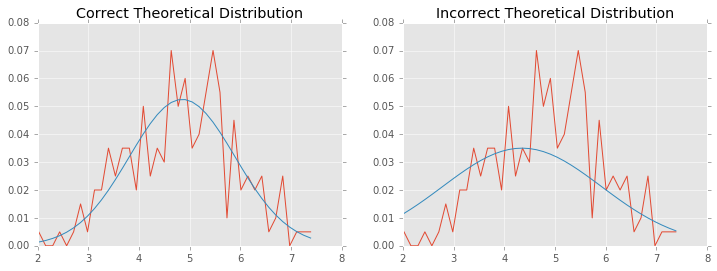

In [26]:
# build figure
plt.subplots(1,2, figsize=(12,4))

# make correct distribution graph
plt.subplot(121)
plt.plot(h[1][0:40], pdf_est)
plt.plot(h[1][0:40], pdfc_tru)
plt.title('Correct Theoretical Distribution')

# make incorrect distribution graph
plt.subplot(122)
plt.plot(h[1][0:40], pdf_est)
plt.plot(h[1][0:40], pdfi_tru)
plt.title('Incorrect Theoretical Distribution')

### 2.6 Conditional probability density functions  

Consider a scenario in which we are measuring the diameter $d_1$ and weight $d_2$ of sand grains drawn randomly from a pile of sand.  We can consider $d_1$ and $d_2$ random variables described by a joint probability density function $p(d_1, d_2)$.  The variables $d_1$ and $d_2$ will be correlated, since large grains will also tend to be heavy.  Now, suppose that $p(d_1, d_2)$ is known.  Once we draw a sand grain from the pile and weigh it, we already know something about its diameter, since diameter is correlated with weight.  The quantity that embodies this information is called the *conditional* probability density function of $d_1$, given $d_2$, and is written $p(d_1 | d_2)$.  

The *conditional* probability density function of $p(d_1 | d_2)$ is not the same as $p(d_1, d_2)$ although it is related to it.  The key difference is that $p(d_1 | d_2)$ is really only a probability density function in the variable $d_1$, with the variable $d_2$ just providing auxiliary information.  Thus, the integral of $p(d_1 | d_2)$ with respect to $d_1$ needs to be unity, regardless of the value of $d_2$.  Thus, we must normalize $p(d_1, d_2)$ by dividing it by the total probability that $d_1$ occurs, given a specific value for $d_2$  

\begin{equation*}
p(d_1 | d_2) = \frac{p(d_1, d_2)}{\int p(d_1, d_2) \text{d} d_1} = \frac{p(d_1, d_2)}{p(d_2)}
\end{equation*}  

Here we have used the fact that $p(d_2) = \int p(d_1, d_2) \text{d} d_1$.  The same logic allows us to calculate the conditional probability density function for $d_2$, given $d_1$

\begin{equation*}
p(d_2 | d_1) = \frac{p(d_1, d_2)}{\int p(d_1, d_2) \text{d} d_2} = \frac{p(d_1, d_2)}{p(d_1)}
\end{equation*}

Combining these two equations yields  

\begin{equation*}
p(d_1, d_2) = p(d_1 | d_2) p(d_2) = p(d_2 | d_1) p(d_1)
\end{equation*}  

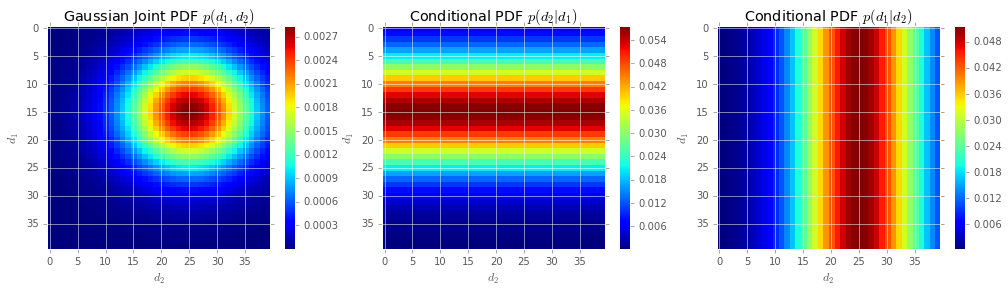

In [27]:
# setup vectors d1 and d2
L = 40
Dd = 1.0
d1 = Dd * np.arange(L)
d2 = Dd * np.arange(L)

# make a Gaussian distribution
d1bar = 15
d2bar = 25
s1 = 7
s2 = 8
norm = 1 / (2 * math.pi * s1 * s2)
p1 = np.exp(-(np.multiply(d1-d1bar, d1-d1bar) / (2 * s1**2)))
p2 = np.exp(-(np.multiply(d2-d2bar, d2-d2bar) / (2 * s2**2)))
P = norm * p1.reshape(L,1).dot(p2.reshape(1,L))

# sum along cols, integrating P along d2 to get p1=p(d1)
p1 = Dd * np.sum(P, axis=1)

# sum along rows, integrating P along d1 to get p2=p(d2)
p2 = Dd * np.sum(P, axis=0)

# conditional distribution P1g2 = P(d1|d2) = P(d1,d2) / p2
P1g2 = np.divide(P, np.ones(L).reshape(L,1) * p2)

# conditional distribution P2g1 = P(d2|d1) = P(d1,d2) / p1
P2g1 = np.divide(P, p1.reshape(L,1) * np.ones(L))

# build plot
plt.subplots(1,3, figsize=(17,4))

# Gaussian Joint PDF p(d1,d2)
plt.subplot(131)
plt.imshow(P, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.title('Gaussian Joint PDF $p(d_1,d_2)$')

# Conditional PDF p(d2|d1)
plt.subplot(132)
plt.imshow(P1g2, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.title('Conditional PDF $p(d_2|d_1)$')

# Conditional PDF p(d1|d2)
plt.subplot(133)
plt.imshow(P2g1, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.xlabel('$d_2$')
plt.ylabel('$d_1$')
plt.title('Conditional PDF $p(d_1|d_2)$')

This result shows that the two conditional probability density functions are related but that they are *not* equal: $p(d_1 | d_2) \neq p(d_2 | d_1)$.  The two equations can be further rearranged into a reult called *Bayes Theorem*  

\begin{equation*}
p(d_1 | d_2) 
= \frac{p(d_2 | d_1) p(d_1)}{p(d_2)} 
= \frac{p(d_2 | d_1) p(d_1)}{\int p(d_1, d_2) \text{d} d_1} 
= \frac{p(d_2 | d_1) p(d_1)}{\int p(d_2 | d_1) p(d_1) \text{d} d_1}
\\
p(d_2 | d_1) 
= \frac{p(d_1 | d_2) p(d_2)}{p(d_1)} 
= \frac{p(d_1 | d_2) p(d_2)}{\int p(d_2, d_1) \text{d} d_2} 
= \frac{p(d_1 | d_2) p(d_2)}{\int p(d_1 | d_2) p(d_2) \text{d} d_2}
\end{equation*}  

Note that only the denominators of the three fractions in each equation are different.  They correspond to three different but equivalent ways of writing $p(d_1)$ and $p(d_2)$.  

As an example, consider the case where the diameter can take on only two discrete values, small (S) and big (B), and when weight can take on only two values, light (L) and heavy (H).  A hypothetical joint probability function is  

\begin{equation*}
P(d_1, d_2) = 
\begin{bmatrix}
d_1 | d_2 & L & H \\
S & 0.8000 & 0.0010 \\
B & 0.1000 & 0.0990
\end{bmatrix}
\end{equation*}

In [28]:
P = np.array([(0.8, 0.001), (0.1, 0.099)])
print(P)

[[ 0.8    0.001]
 [ 0.1    0.099]]


In this scenario, about 90% of the small sand grains are light, about 99% of the large rains are heavy, and small/light grains are much more common than big/heavy ones.  Univariate distributions are computed by summing over rows or columns, and:  

\begin{equation*}
P(d_1) = 
\begin{bmatrix}
d_1 &  \\
S & 0.8010 \\
B & 0.1990
\end{bmatrix}
\qquad \text{and} \qquad
P(d_2) = 
\begin{bmatrix}
d_2 & L & H \\
 & 0.9000 & 0.1000
\end{bmatrix}
\end{equation*}

According to Bayes' Theorem, the conditional probabilities are  

\begin{equation*}
P(d_1 | d_2) = 
\begin{bmatrix}
d_1 | d_2 & L & H \\
S & 0.8888 & 0.0100 \\
B & 0.1111 & 0.9900
\end{bmatrix}
\qquad \text{and} \qquad
P(d_2 | d_1) = 
\begin{bmatrix}
d_2|d_1 & L & H \\
S & 0.9986 & 0.0012 \\
B & 0.5025 & 0.4974
\end{bmatrix}
\end{equation*}  

Now suppose that we pick one sand grain from the pile, measure its diameter, and determine that it is big.  What is the probability that it is heavy?  We may be tempted to think that the probability is very high, since weight is highly correlated to size.  But this reasoning is incorrect because heavy grains are about equally divided between the big and small size categories.  The correct probability is given by $P(H|B)$, which is 49.74%.  

Bayes theorem offers some insight into what is happening.  Adapted for discrete values by interpreting the integral as a sum becomes  

\begin{equation*}
P(H|B) = \frac{P(B|H)P(H)}{P(B|L)P(L) + P(B|H)P(H)} = \frac{0.9900 \times 0.1000}{0.1111 \times 0.9000 + 0.9900 \times 0.1000} = \frac{0.0990}{0.1000 + 0.0990} = \frac{0.0990}{0.1990} = 0.4974
\end{equation*}  

The numerator represents the big, heavy graints and the denominator represents *all* the ways that one can get big grains, that is, the sum of big, heavy grains and big, light grains.  In the scenario, light grains are extremely common, and although only a small fraction of them are heavy, their number affects the probability very significantly.  

The above analysis, called *Bayesian Inference*, allows us to assess the importance of any given measurement.  Before having measured the size of the sand grain, our best estimate of whether it is heavy is 10%, because heavy grains make up 10% of the total population (that is, P(H)=0.10).  After the measurement, the probability rises to 49.74%, which is about a factor of five more certain.  In **Chapter 5**, we will see Bayesian Inference playing an important role in the solution of inverse problems.  

### 2.7 Confidence intervals  

The confidence of a particular observation is the probability that one realization of the random variable falls within a specified distance of the true mean.  Confidence is therefore related to the distribution of area in *p(d)*.  If most of the area is concentrated near the mean, then the interval for, say7, 95% confidence will be very small; otherwise, the confidence interval will be large.  The width of the confidence interval is related to the variance.  Distributions with large variances will also tend to have large confidence intervals.  Nevertheless, the relationship is not direct, since variance is a measure of width, not area.  The relationship is easy to quantify for the simplest univariate distributions.  For instance, Gaussian probability functions have 68% confidence intervals 1$\sigma$ wide and 95% confidence intervals 2$\sigma$ wide.  Other types of simple distributions have similar relationships.  If one knows that a particular Gaussian random variable has $\sigma = 1$, then if a realization of that vairable has the value 50, one can stat that there is a 95% chance that the mean of the random variable lies between 48 and 52.  One might symbolize this by $\langle d \rangle = 50 \pm 2$ (95%).  

The concept of confidence intervals is more difficult to work with when one is dealing with joint probability density ufnctions of several correlated random variables.  One must define some volume in the space of data and compute the probability that the true means of the data are within the volume.  One must also specify the shape of that volume.  The more complicated the distribution, the more difficult it is to choose an appropriate shape and calculate the probability within it.  

Even in the case of the Gaussian multivariate probability density functions, statements about confidence levels need to be made carefully, as is illustrated by the following scenario.  Suppose that the Gaussian probability density function $p(d_1, d_2)$ represents two measurements, say the length and diameter of a cylinder, and suppose that these measurements are uncorrelated with equal variance, $\sigma_d^2$.  As we might expect, the univariate probability density function $p(d_1) = \int p(d_1, d_2) \text{d} d_2$ has variance, $\sigma_d^2$, and so the probability, $P_1$, that $d_1$ falls between $d_1 - \sigma_d$ and $d_1 + \sigma_d$, is 0.68 or 68%.  Similarly, the probability, $P_2$, that $d_2$ falls between $d_2 - \sigma_d$ and $d_2 + \sigma_d$, is also 68%.  But $P_1$ represents the probability of $d_1$, irrespective of the value of $d_2$, and $P_2$ represents the probability of $d_2$, irrespective of the value of $d_1$.  The probability, *P*, that *both* $d_1$ and $d_2$ simulataneously fall within their respective one-sigma confidence intervals is $P = P_1 P_2 = (0.68)^2 = 0.46$ or 46%, which is significantly smaller than 68%!  

One occasionally encounters a journal article containing a table of many (say 100) estimated parameters, each one with a stated $2 \sigma$ error bound.  The probability that *all one hundred* measurements fall within their respective bounds is $(0.95)^100$ or 0.6% - which is pretty close to zero!  

### 2.8 Computing realizations of random variables  

The ability to create a vector of realizations of a random variable is very important.  For instance, it can be used to simulate noise when testing a data analysis method on synthetic data (that is, artificially prepared data with well-controlled properties).  And it can be used to generate a suite of possible models, to test against the data.  

*Python* (via *NumPy*) provides a function *np.random.normal(dbar, sd, N)* which creates a vector of *N* Gaussian-distributed data with mean *dbar* and variance $sd^2$.  In cases where no predefined function is available, it is possible to transform an available distribution, say *p(d)*, into the desired distribution, say *q(m)*, using the transformation rule.  

\begin{equation*}
p[d(m)] \frac{\text{d}d}{\text{d}m} = q(m)
\end{equation*}

Most software environments provide a predefined function for realizations of a uniform distribution on the interval (0,1).  Then, since *p(d)=1*, the above is a differential equation for *d(m)*.  

\begin{equation*}
\frac{\text{d}d}{\text{d}m} = q(m)
\qquad \text{or} \qquad
d = \int q(m) \text{d}m = Q(m)
\end{equation*}  

Here, *Q(m)* is the cumulative probability distribution corresponding to *q(m)*.  The transformation is then $m=Q^{-1}(d)$; that is, one must invert the cumulative probability distribution to give the value of *m* for which the probability *d* occurs.  Thus, the transformation requires that the inverse cumulative probability distribution be known.  

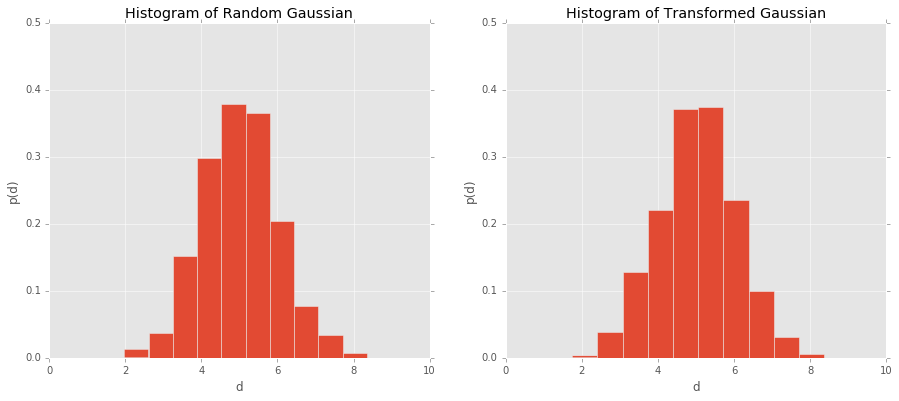

In [33]:
# set mean and variance for simulated data
N = 1000
mbar = 5.0
sigma = 1.0

# randomly sample using Gaussian distribution
mnormal1 = np.random.normal(mbar, sigma, N)

# randomly sample using uniform distribution and transform
muniform = np.random.uniform(0, 1, N)
mnormal2 = scipy.stats.norm.ppf(muniform, loc=mbar, scale=sigma)

# build figure
plt.subplots(1,2, figsize=(15,6))

# plot histogram of randomly sampled data
plt.subplot(121)
plt.hist(mnormal1, normed=True)
plt.title('Histogram of Random Gaussian')
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('d')
plt.ylabel('p(d)')

# plot probability density function
plt.subplot(122)
plt.hist(mnormal2, normed=True)
plt.title('Histogram of Transformed Gaussian')
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('d')
plt.ylabel('p(d)')

This approach offers no advantage to sampling a Gaussian distribution directly, but it is available and is of practical use in cases not supported by *Python*.  Another method of producing a vector of realizations of a random variable is the *Metropolis-Hastings algorithm*.  It is a useful alternative to the transformation method described above, especially since it requires evaluating only the probability density function *p(d)* and not its cumulative inverse.  It is an iterative algorithm that builds the vector **d** element by element.  The first element, $d_1$, is set to an arbitrary number, such as zero.  Subsequent elements are generated in sequence, with an element $d_i$, generating a successor $d_{i+1}$ according to this algorithm: First, randomly draw a *proposed* successor *d'* from a conditional probability density function $q(d`|d_i)$.  The exact form of $q(d`|d_i)$ is arbitrary; however, it must be chosen to that $d`$ is typically in the neighborhood of $d_i$.  One possible choice is the Gaussian function.  

\begin{equation*}
q(d'|d_i) = \frac{1}{(2 \pi)^{1/2} \sigma} \text{exp} \left\{ - \frac{(d'-d_i)^2}{2 \sigma^2}  \right\}
\end{equation*}  

Here, $\sigma$ represents the size of the neighborhood, that is, the typical deviation of $d'$ away from $d_i$.  Second, generate a random number $\alpha$ drawn from a uniform distribution on the interval (0,1).  Third, accept the proposed successor and set $d_{i+1}=d'$ if

\begin{equation*}
\alpha < \frac{p(d')q(d_i|d')}{p(d_i)q(d'|d_i)}
\end{equation*}  

Otherwise, set $d_{i+1}=d_i$.  When repeated many times, this algorithm leads to a vector **d** that has approximately the probability density function *p(d)*.  Note that the conditional probability density functions cancels when $q(d'|d_i)=q(d_i|d')$, as is the case for the Gaussian.

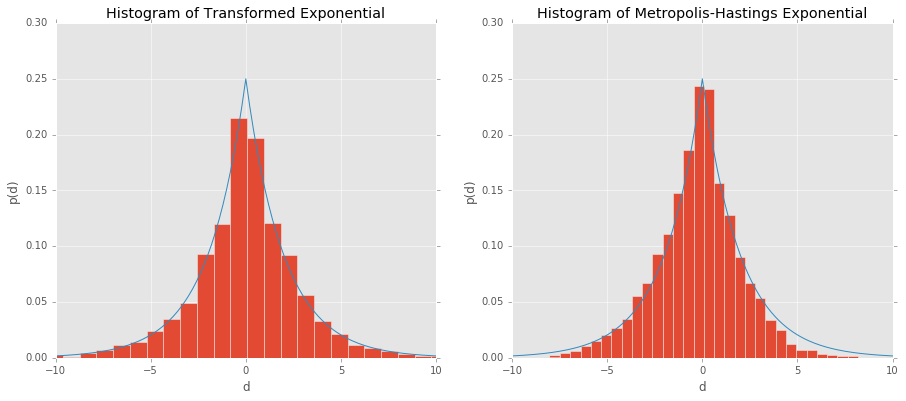

In [50]:
# Create realizations of an exponential probability density function in two ways:
#      A) Transformation of a Uniform distribution
#      B) Metropolis-Hastings algorithm
# In this example, pdf is p(d) = c*exp(-d)/c; for d > 0

# setup data vector
dmin = -10
dmax = 10
N = 201
Dd = (dmax - dmin) / (N-1)
d = dmin + Dd * np.arange(N)

# evaluate exponential distribution
c = 2.0
pexp = (0.5 / c) * np.exp(-abs(d) / c)

# A) Transformation of a Uniform distribution
M = 5000
rm = np.random.uniform(-1, 1, M)
rd1 = np.multiply(- np.sign(rm) , c * np.log((1-np.absolute(rm))))

# B) Metropolis-Hastings algorithm
Niter = 5000
rd2 = np.zeros(Niter)
prd = np.zeros(Niter)
rd2[0] = 0.0
prd[0] = (1/c) * np.exp(- np.absolute(rd2[1]) / c)
s = 1

for k in range(1, Niter):
    # old realization
    rdo = rd2[k-1]
    prdo = prd[k-1]
    rdn = np.random.normal(rdo, s, 1)
    prdn = (0.5 / c) * math.exp(-abs(rdn)/c)
    
    alpha = prdn / prdo
    
    if (alpha > 1):
        rd2[k] = rdn
        prd[k] = prdn
    else:
        r = np.random.uniform(0, 1, 1)[0]
        if (alpha > r):
            rd2[k] = rdn
            prd[k] = prdn
        else:
            rd2[k] = rdo
            prd[k] = prdo

# build figure
plt.subplots(1,2, figsize=(15,6))

# plot histogram of randomly sampled data
plt.subplot(121)
plt.hist(rd1, bins=30, normed=True)
plt.plot(d, pexp)
plt.title('Histogram of Transformed Exponential')
plt.xlim(-10,10)
plt.ylim(0,0.3)
plt.xlabel('d')
plt.ylabel('p(d)')

# plot histogram of randomly sampled data
plt.subplot(122)
plt.hist(rd2, bins=30, normed=True)
plt.plot(d, pexp)
plt.title('Histogram of Metropolis-Hastings Exponential')
plt.xlim(-10,10)
plt.ylim(0,0.3)
plt.xlabel('d')
plt.ylabel('p(d)')

### End of Chapter